<a href="https://colab.research.google.com/github/CheronoK/Housing-Prices-Prediction-IP/blob/master/Cherono_Independent_Project__Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Prediction for Hass Consulting Company

## 1. Defining the Question

### a.) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. 

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b.) Defining the Metric for Success

The success of this project will be determined by:

1. The Root Mean Squared Error and Mean Squared Error of each of the the models built should be lower compared to those of the baseline models.
2. The Accuracy score of the models should be better than those of the baseline models.
3. The coefficients of the not so useful variables should not shrink to zero but towards zero in the Ridge Regression model.
3. The coefficients of the not so useful variables should shrink to zero in the the Lasso and Elastic Net Regression models.





### c.) Understanding the context

Real estate is property consisting of land and the buildings on it, along with its natural resources such as crops, minerals or water i.e immovable property of this nature. In general real estate involves buildings or housing.

A real estate company is a company that buys, sells, and rents these properties.

The main focus here is the pricing of the houses by the real estate company.

The prices of houses may vary depending on a number of factors such as: 
*   Number of Bedrooms
*   Number of Bathrooms
*   Square feet area of living area
*   Square feet area of parking Layout
*   Number of Floors
*   Whether waterfront is there or not
*   Square feet area above basement
*   Square feet area off basement
*   Year the house is built
*   Year the house is renovated 
*   Zipcode of the house
*   Latitude of the house
*   Longitude of the house

These factors are hereby used to predict the price of a particular house by the real estate company.

### d.) Recording the experimental design

The following are the steps taken to implement the solution : 
* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

### e.) Data Relevance

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.

Dataset link: http://bit.ly/IndependentProjectWeek7Dataset

## 2.) Reading the data

### a.) Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

### b.) Loading the datasets

In [4]:
#Loading the dataset
data = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
data.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

## 3.) Checking the Data 

In [5]:
#Determining the number of records in our dataset
data.shape

(21613, 20)

The dataset has 20 columns and 21,613 entries  

In [6]:
#Checking the top records of the dataset
data.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [7]:
#Checking the bottom records of the dataset
data.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [8]:
#Checking for unique values in dataset
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [10]:
#Checking for null values in our dataset
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataset has no null values.

In [11]:
#Checking for duplicated rows
data.duplicated().sum()

3

The dataset has 3 duplicated entries.

In [12]:
#Checking the data types in each column
data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The data types are float and integers and each column has appropriate data types.

In [13]:
#Checeking for the general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 4.) External Dataset Validation

Upon checking several Real Estate websites, it was noted that the pricing of a house is actually affected by different factors. Most of the factors are present in the dataset. Although some factors are not considered, our dataset contains most of the factors which are more than enough to predict the prices of houses.

## 5.) Tidying the dataset

In [14]:
#Dropping the duplicated rows
data = data.drop_duplicates()
#Checking if the duplicates have been dropped
data.duplicated().any()

False

There are no more duplicates in the dataset

In [15]:
#Dropping the id column as it is not a useful factor in predicting the price of a house
data.drop('id', axis=1, inplace=True)
data.head()

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ... -122.257           1340        5650
1  538000.0         3       2.25  ... -122.319           1690        7639
2  180000.0         2       1.00  ... -122.233           2720        8062
3  604000.0         4       3.00  ... -122.393           1360        5000
4  510000.0         3       2.00  ... -122.045           1800        7503

[5 rows x 19 columns]

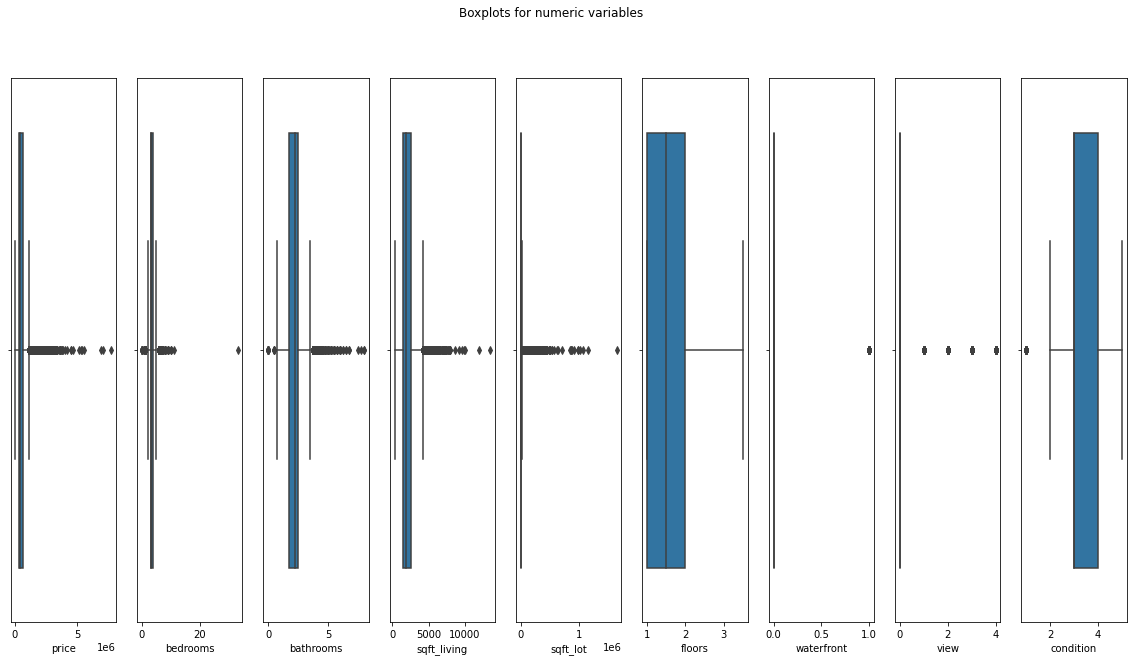

In [16]:
#Checking for outliers as some of the models do not do well with the presence of outliers
#Plotting boxplots to visualize outliers in the dataset

#Plotting for the first 9 variables
fig, ((ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9)) = plt.subplots(1,9, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(data['price'], ax=ax1)
sns.boxplot(data['bedrooms'], ax=ax2)
sns.boxplot(data['bathrooms'], ax=ax3)
sns.boxplot(data['sqft_living'], ax=ax4)
sns.boxplot(data['sqft_lot'], ax=ax5)
sns.boxplot(data['floors'], ax=ax6)
sns.boxplot(data['waterfront'], ax=ax7)
sns.boxplot(data['view'], ax=ax8)
sns.boxplot(data['condition'], ax=ax9)
plt.show()

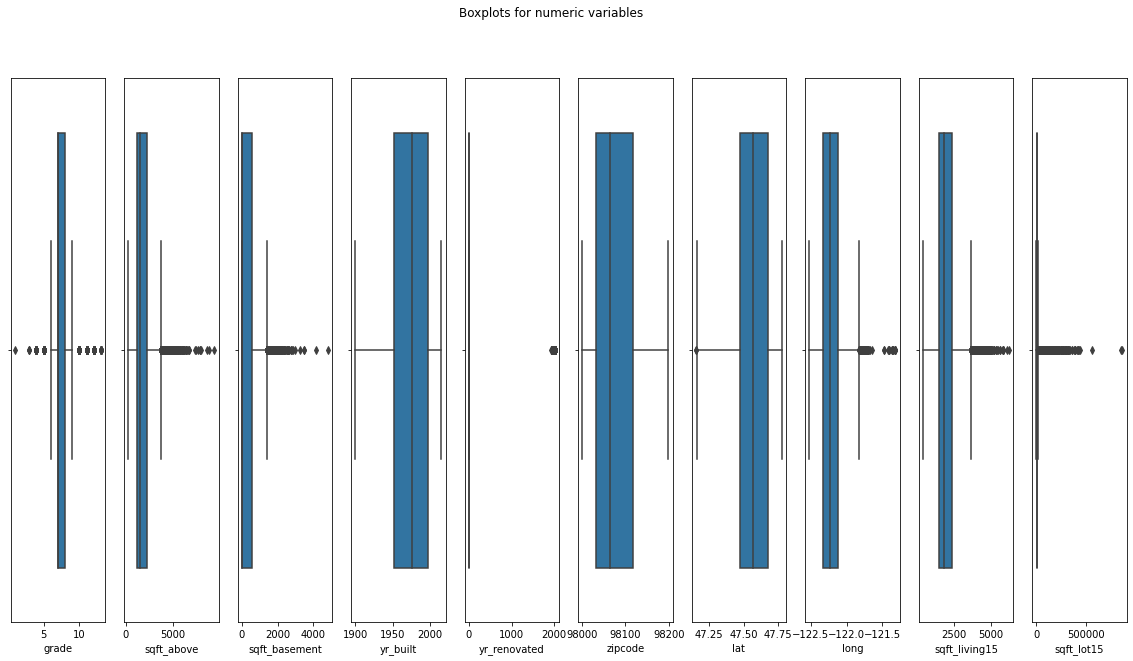

In [17]:
#Checking for outliers in the other remaining variables
#Plotting boxplots to visualize outliers in the dataset
fig, ((ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)) = plt.subplots(1,10, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(data['grade'], ax=ax1)
sns.boxplot(data['sqft_above'], ax=ax2)
sns.boxplot(data['sqft_basement'], ax=ax3)
sns.boxplot(data['yr_built'], ax=ax4)
sns.boxplot(data['yr_renovated'], ax=ax5)
sns.boxplot(data['zipcode'], ax=ax6)
sns.boxplot(data['lat'], ax=ax7)
sns.boxplot(data['long'], ax=ax8)
sns.boxplot(data['sqft_living15'], ax=ax9)
sns.boxplot(data['sqft_lot15'], ax=ax10)

Outliers are present in our dataset. Most of the columns are heavy with outliers. 

However, we'll not remove these outliers now.

We'll only remove them in the case of building a model which is heavily biased by a few outliers.

## 6.) Exploratory Analysis

### a.) Univariate Analysis

#### i.) Statistical Descriptions

In [18]:
#Checking statistical descriptions of the dataset
data.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.161000e+04  21610.000000  ...   21610.000000   21610.000000
mean   5.401789e+05      3.370847  ...    1986.518695   12769.031976
std    3.673876e+05      0.930110  ...     685.425781   27305.972464
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.216125e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 19 columns]

The above simply gives the measures of central tendency and some measures of dispersion of the different columns in the dataset.

#### ii.) Histograms

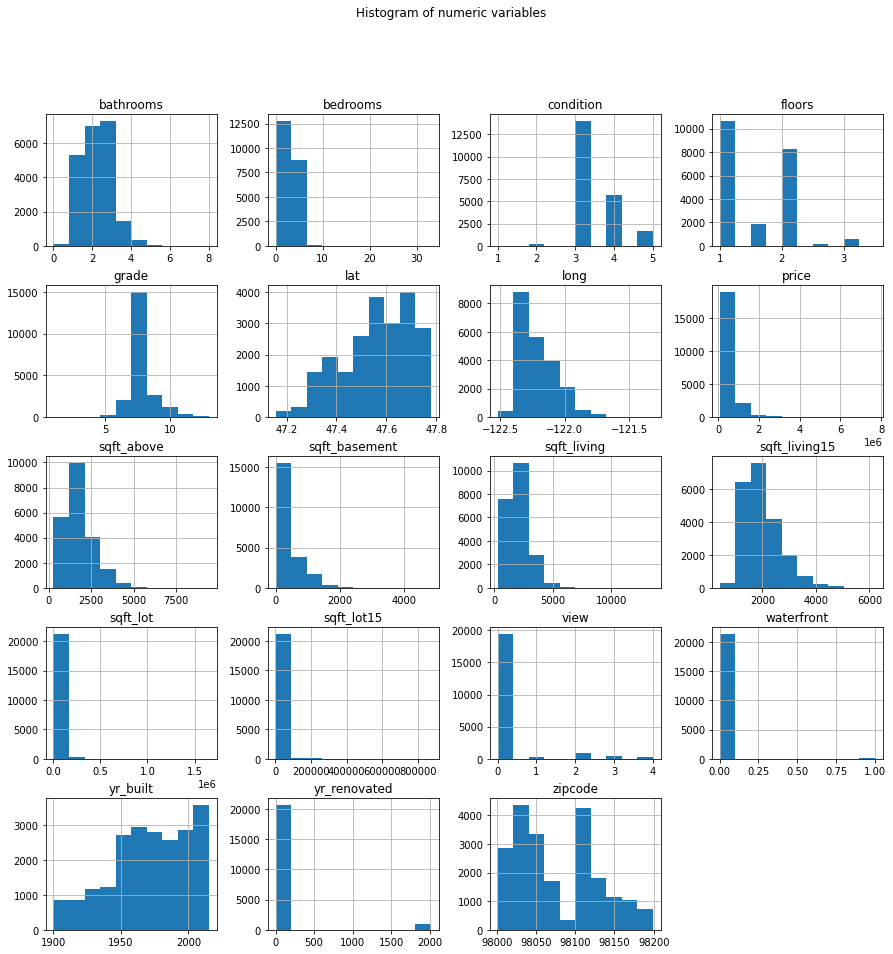

In [19]:
#Plotting the variables on histograms to view their distributions.
data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Real EState Histogram')
plt.show()

Most of the variables are positively skewed i.e. they are skewed to the right with the exception of the year built and latitude which are negatively skewed i.e they are skewed to the left.

Generally, our data is very skewed.

#### iii.) Distribution plots

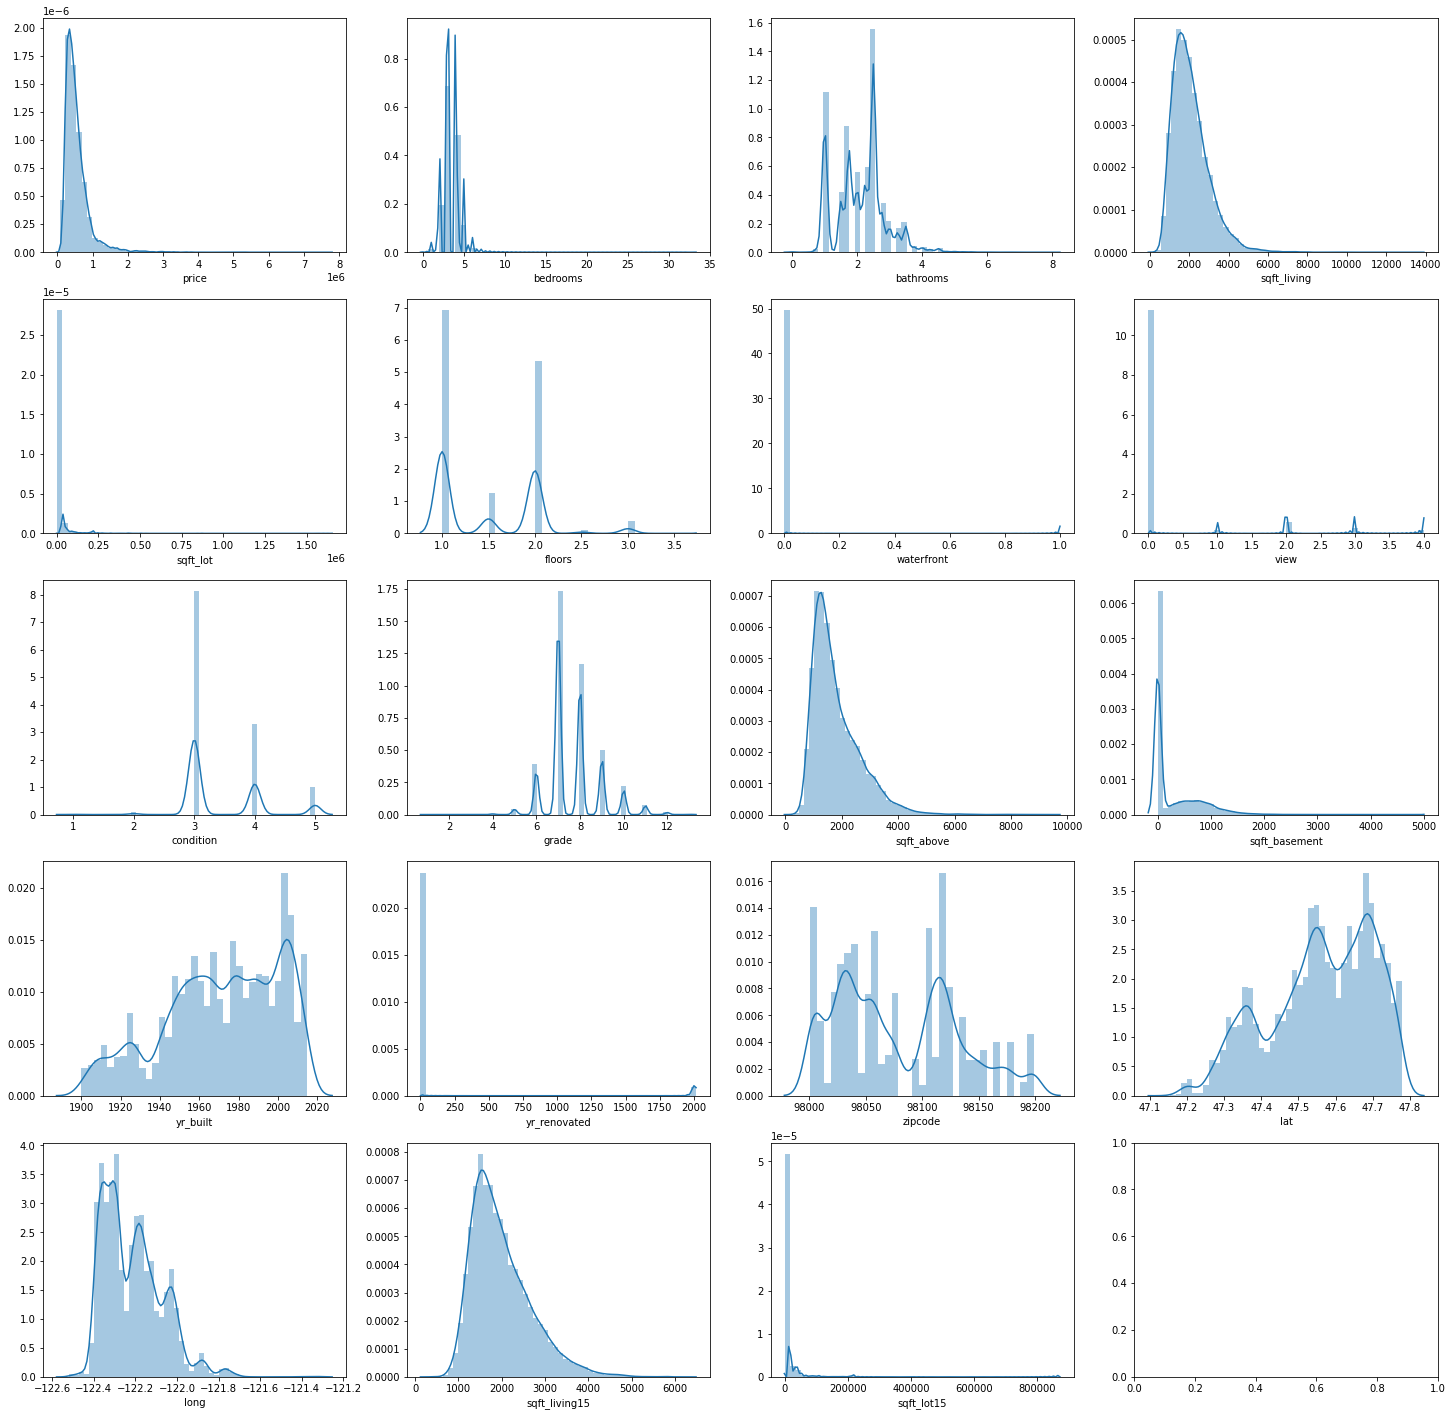

In [20]:
#Plotting distribution plots for all variables to see the type of distribution they possess
f, axes = plt.subplots(5, 4, figsize=(25, 25), sharex=False)
sns.distplot( data["price"],ax=axes[0, 0])
sns.distplot( data["bedrooms"],ax=axes[0, 1])
sns.distplot( data["bathrooms"],ax=axes[0, 2])
sns.distplot( data["sqft_living"], ax=axes[0, 3])
sns.distplot( data["sqft_lot"],ax=axes[1, 0])
sns.distplot( data["floors"],ax=axes[1, 1])
sns.distplot( data["waterfront"],ax=axes[1, 2])
sns.distplot( data["view"],ax=axes[1, 3])
sns.distplot( data["condition"],ax=axes[2, 0])
sns.distplot( data["grade"],ax=axes[2, 1])
sns.distplot( data["sqft_above"],ax=axes[2, 2])
sns.distplot( data["sqft_basement"],ax=axes[2, 3])
sns.distplot( data["yr_built"],ax=axes[3, 0])
sns.distplot( data["yr_renovated"],ax=axes[3, 1])
sns.distplot( data["zipcode"],ax=axes[3, 2])
sns.distplot( data["lat"],ax=axes[3, 3])
sns.distplot( data["long"],ax=axes[4, 0])
sns.distplot( data["sqft_living15"],ax=axes[4, 1])
sns.distplot( data["sqft_lot15"],ax=axes[4, 2])

Most of the variables do not depict a normal distribution.

#### iv.) Countplots

Plotting countplots for variables with fewer unique values

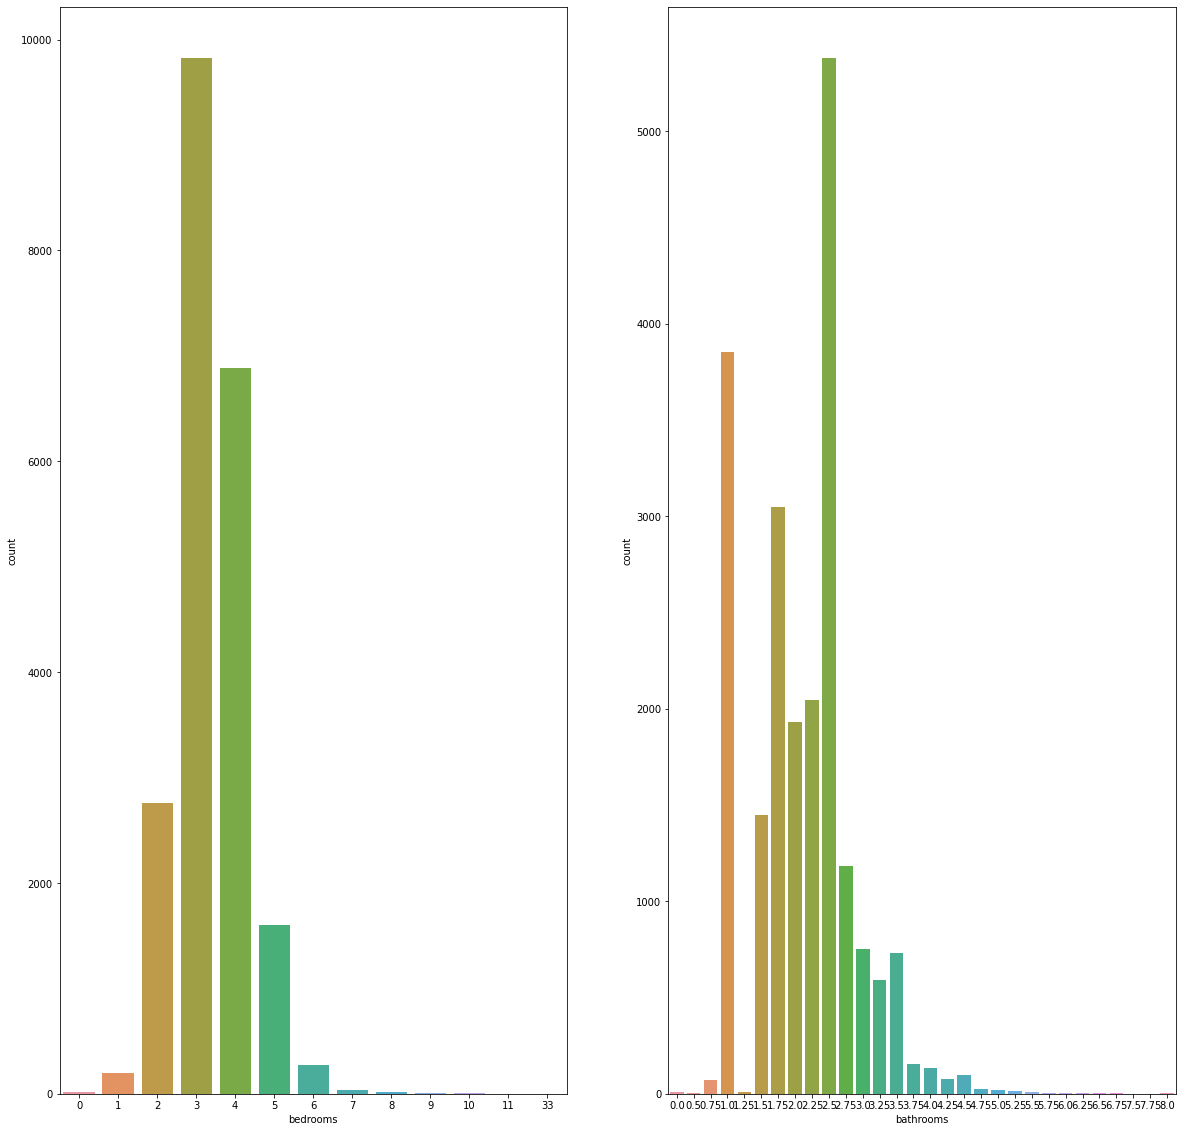

In [21]:
#Plotting countplots for type of bedrooms and bathrooms
fig, ax = plt.subplots(1,2, figsize=(20, 20))
sns.countplot(data['bedrooms'], ax=ax[0])
sns.countplot(data['bathrooms'], ax=ax[1])
fig.show()

Most of the houses have 3 bedrooms followed by 4 bedrooms. Houses with no bedrooms and more than 7 bedrooms are very few.

Most of the houses also have 2.50 bathrooms followed by those with only 1 bathroom. Houses with no bathrooms and those with more than 5 bathrooms are fewer.

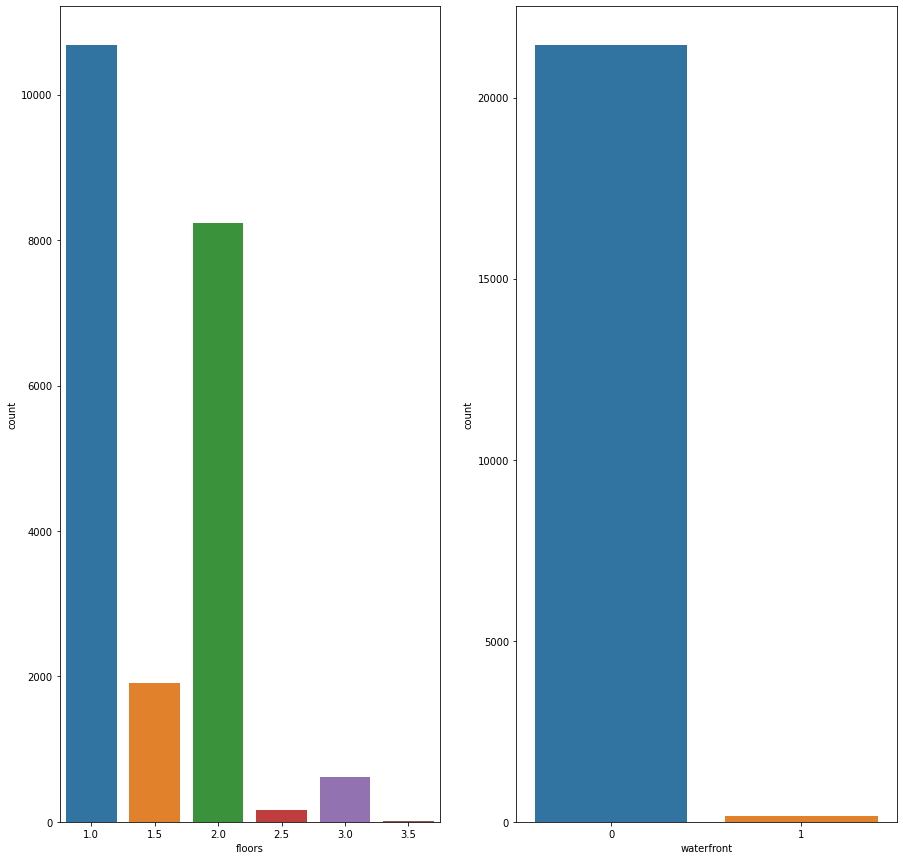

In [22]:
#Plotting countplots for the types of floors and waterfront
fig, ax = plt.subplots(1,2, figsize=(15, 15))
sns.countplot(data['floors'], ax=ax[0])
sns.countplot(data['waterfront'], ax=ax[1])
fig.show()

Majority of the houses have 1 floor followed by those with 2 floors. There are fewer houses with more than 2.5 floors.

Majority of the houses also do not have a waterfront, very few houses have a waterfront.

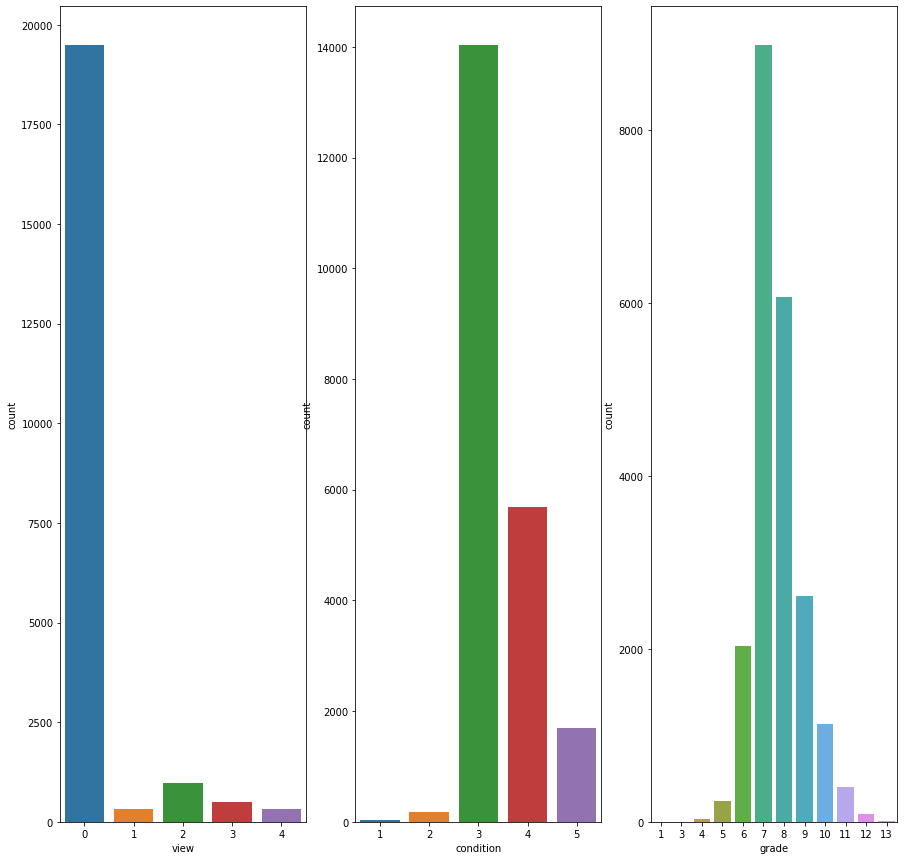

In [24]:
#Plotting count plots for the type of view, condition and grade of the house
fig, ax = plt.subplots(1,3, figsize=(15, 15))
sns.countplot(data['view'], ax=ax[0])
sns.countplot(data['condition'], ax=ax[1])
sns.countplot(data['grade'], ax=ax[2])
fig.show()

Majority of the houses  have 0 number of views followed by 2 views with very few houses having 1 view and 4 views.

Majority of the houses have a condition of 3 with very few houses having a condition of 1 and 2.

Most of the houses also have a grade of 7 followed by 8 then 9. Very few houses have been graded at 1,3,4 and 13.

#### v.) Frequency tables

Plotting frequency tables for variables with many different values.

In [25]:
#Plotting a frequency table for the prices
data['price'].value_counts()

450000.0    172
350000.0    172
550000.0    158
500000.0    152
425000.0    150
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3625, dtype: int64

Most of the houses are priced at 450000 and 350000 followed by 550000, 500000 and 425000.

The prices 884744, 336950, 870515, 804995 and 234975 have only one houses priced at these prices.

In [27]:
#Plotting a frequency table for the Square feet area of the living area
data['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64

They are more houses with a smaller square feet area of living area with very few houses having a larger square feet area of living area.

In [28]:
#Plotting a frequency table for the Square feet area of parking Layout
data['sqft_lot'].value_counts()

5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
17313      1
35752      1
937        1
9133       1
14321      1
Name: sqft_lot, Length: 9782, dtype: int64

They are more houses with the Square feet area of parking Layout ranging between 4000 and 7200 with very few houses having Square feet area of parking Layout more than 10,000.

In [29]:
#Plotting a frequency table for the Square feet area off above the basement
data['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: sqft_above, Length: 946, dtype: int64

More houses have less than 1300 Square feet area off above the basement with very few houses having Square feet area off above the basement more than 1500.

In [30]:
#Plotting a frequency table for the Square feet area off basement
data['sqft_basement'].value_counts()

0       13124
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

Most of the houses have no basement area with very few houses having a basement area.

In [31]:
#Plotting a frequency table for the Year the house is built
data['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Most of the houses were built after 2000 with fewer houses built in the 90's.

In [32]:
#Plotting a frequency table for the Year the house is renovated
data['yr_renovated'].value_counts()

0       20697
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the houses have never been renovated. However, the renovated houses were mostly renovated 2014 and 2013.
Very few houses were renovated in the 90's.

In [33]:
#Plotting a frequency table for the zipcode of the house
data['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Most of the houses are located in areas with the zipcode 98103 and very few in the area with zipcode 98039.

### b.) Bivariate Analysis

#### i.) Barplots

Plotting bar plots for different factors to see how they affect the pricing of the house.

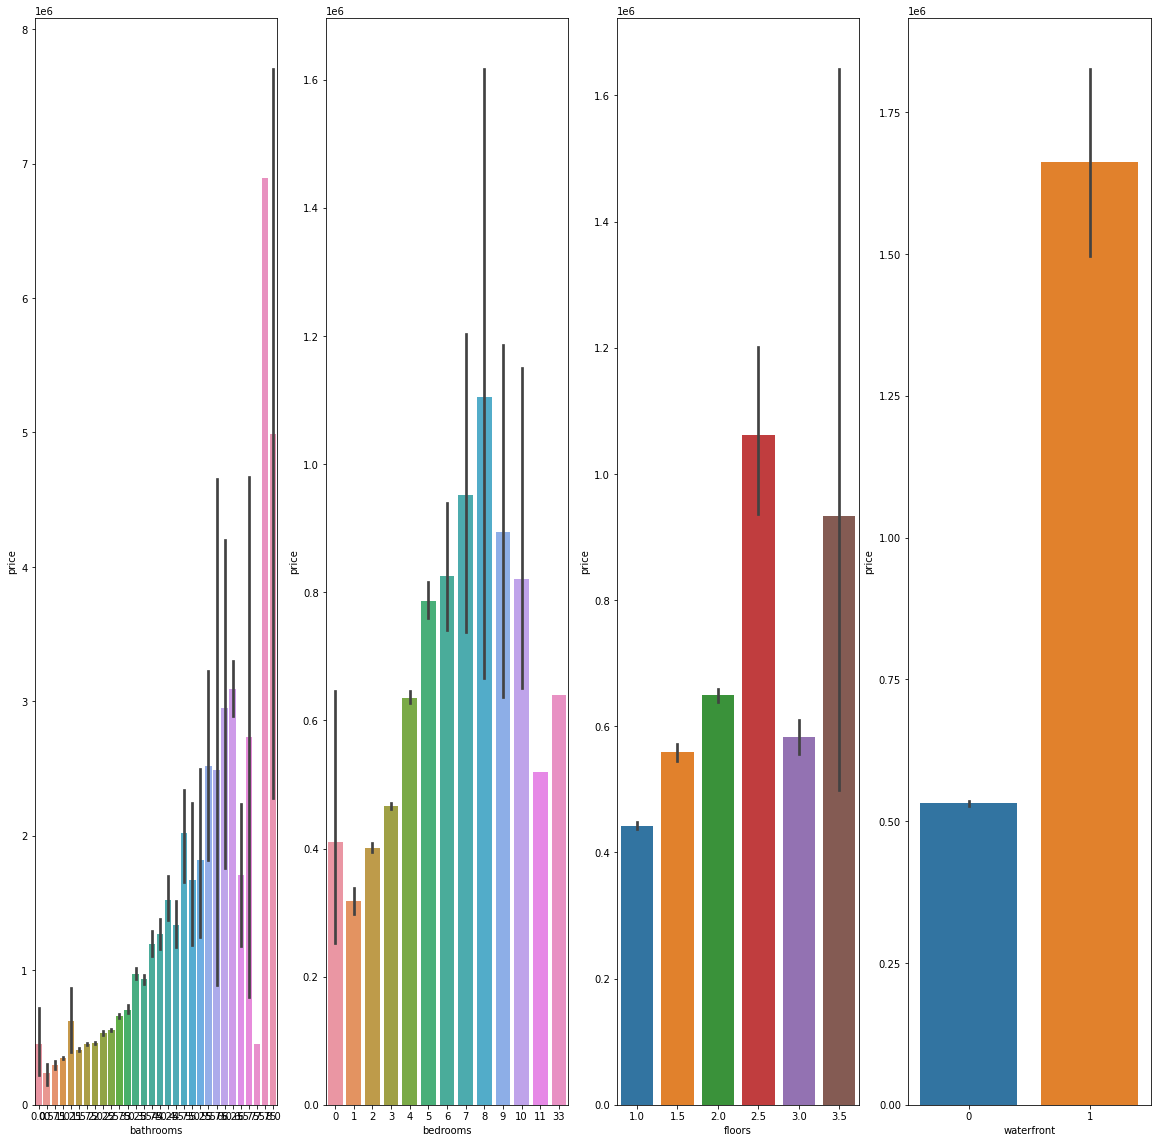

In [34]:
#Plotting barplots to show how the number of bathrooms, number of bedrooms, number of floors and presence of a waterfront affect the price of the house
fig, ax = plt.subplots(1,4, figsize=(20, 20))
sns.barplot(x= 'bathrooms', y = 'price', data = data, ax=ax[0])
sns.barplot(x= 'bedrooms', y = 'price', data = data, ax=ax[1])
sns.barplot(x= 'floors', y = 'price', data = data, ax=ax[2])
sns.barplot(x= 'waterfront', y = 'price', data = data, ax=ax[3])
fig.show()

The number of bathrooms affect the pricing such that houses with many bathrooms are highly priced compared with houses with few bathrooms, however houses with 7.5 bathrooms are not highly priced.

The prices of the house also increases with the number of bedrooms. Houses with 8 bedrooms are highly prices compared to houses with 1 bedroom which is priced at a lower price.

The number of floors also affect the pricing of the house such that, houses with 2.5 floors are priced higher than the rest while houses with 1 floor have lower prices.

In addition houses with a waterfront have higher prices than houses with no waterfront.

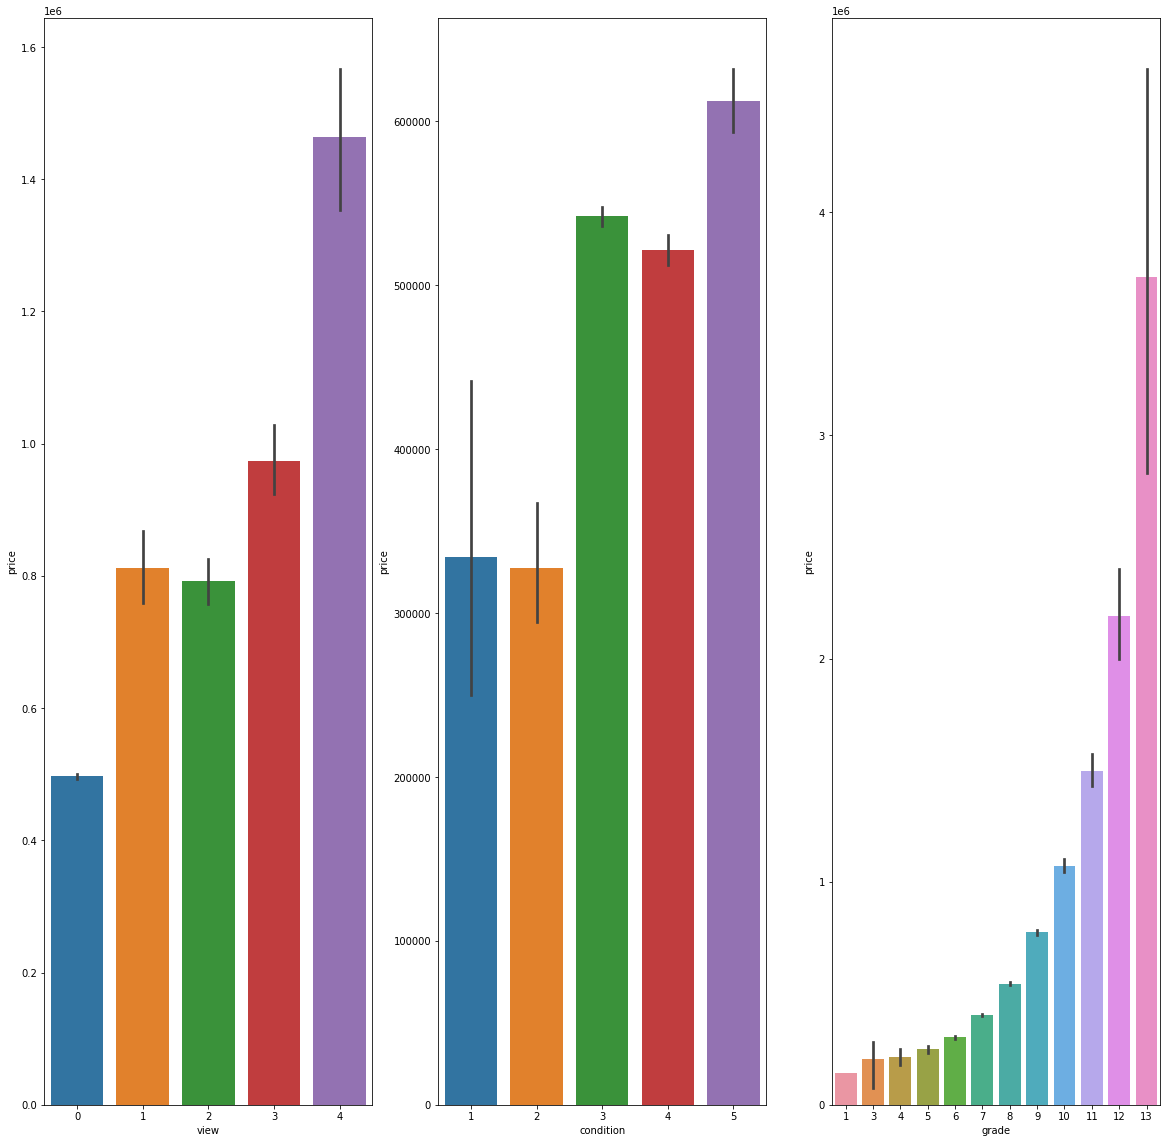

In [35]:
#Plotting barplots to show how the number of views, condition of the house and the grade of the house affect the price of the house
fig, ax = plt.subplots(1,3, figsize=(20, 20))
sns.barplot(x= 'view', y = 'price', data = data, ax=ax[0])
sns.barplot(x= 'condition', y = 'price', data = data, ax=ax[1])
sns.barplot(x= 'grade', y = 'price', data = data, ax=ax[2])
fig.show()

Increase in the number of views results to a corresponding increase in the price of the house with houses having 4 views having high prices compared to houses with no views.

Houses with a condition of 5 are highly priced while those with condition of 2 the least priced.

The price also increases with increase in the grade of the house with houses graded at 13 having the highest prices.

#### ii.) Relational Plots

Plotting relational plots for variables whose values are too many to fit in a bar plot in order to see how they affect house prices.

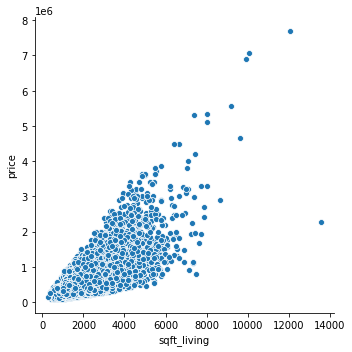

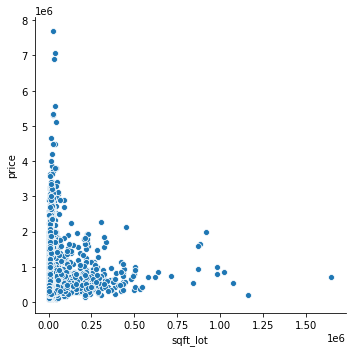

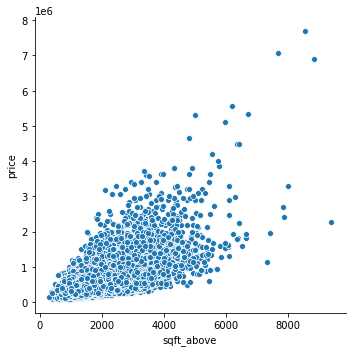

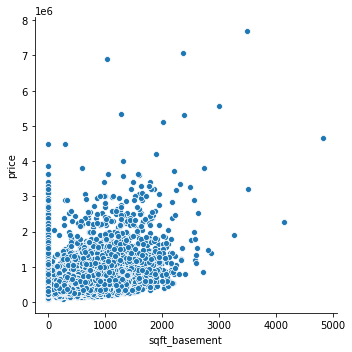

In [36]:
#Plotting relational plots to show how the Square feet area of the living area, the Square feet area of the parking Layout,
# the Square feet area above the basement and the Square feet area off basement affect the pricing of the houses.
sns.relplot(x="sqft_living", y="price", data=data)
sns.relplot(x="sqft_lot", y="price", data=data)
sns.relplot(x="sqft_above", y="price", data=data)
sns.relplot(x="sqft_basement", y="price", data=data)

From  the above relational plots we can conclude that;



> The price of the house increases with increase in the square feet area of the living room area. This is also the same for the area above the basement and the area of the basement.


> Houses with a small area of the parking layout are highly priced. However, houses with a large area of the parking layout are priced at a low price.





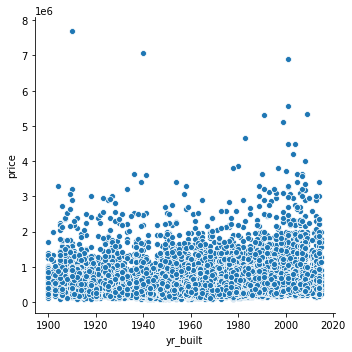

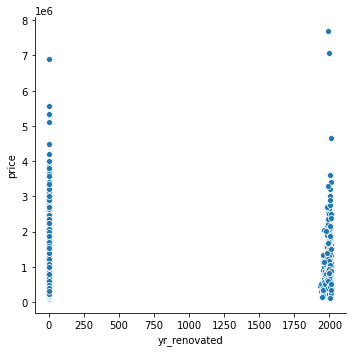

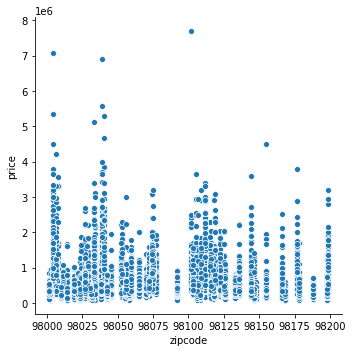

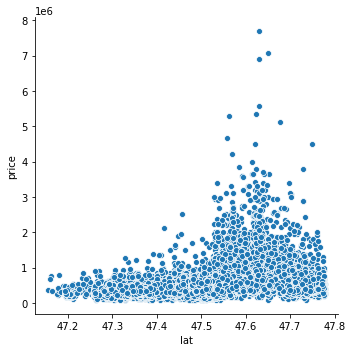

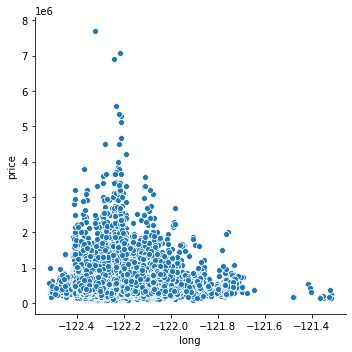

In [37]:
#Plotting relational plots to show how the year the house was built, the year it was renovated, the zipcode of the house,
#the latitude and the longitude affect the pricing of the house
sns.relplot(x="yr_built", y="price", data=data)
sns.relplot(x="yr_renovated", y="price", data=data)
sns.relplot(x="zipcode", y="price", data=data)
sns.relplot(x="lat", y="price", data=data)
sns.relplot(x="long", y="price", data=data)

From the above relational plots we can conclude that;

> Houses built in the 90's are equally as priced as houses built in the 2000's. However, some of the houses built in the 2000's are highly priced


> Houses that were renovated are just as equally priced as houses that have never been renovated. However the house with the highest price was renovated in the 2000's.


> Houses in various zipcodes do not differ as much in prices as each zipcode has different prices of the houses. However, the most priced is in zipcode 98100.


> Latitude and longitude also affect the prices of the house. Houses with a higher latitude are highly priced compared to those with a low latitude. This is the opposite for longitudes as houses with lower longitudes have higher prices compared to houses with higher longitudes.




#### iii.) Correlation

In [38]:
#Checking how our varibales are correlated using a matrix
corrMatrix = data.corr()
corrMatrix

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308346  ...       0.585382    0.082457
bedrooms       0.308346  1.000000  ...       0.391633    0.029233
bathrooms      0.525140  0.515935  ...       0.568665    0.087191
sqft_living    0.702046  0.576674  ...       0.756420    0.183285
sqft_lot       0.089658  0.031699  ...       0.144620    0.718556
floors         0.256793  0.175448  ...       0.279861   -0.011250
waterfront     0.266332 -0.006583  ...       0.086469    0.030702
view           0.397466  0.079433  ...       0.280404    0.072577
condition      0.036397  0.028422  ...      -0.092854   -0.003424
grade          0.667478  0.357003  ...       0.713208    0.119265
sqft_above     0.605569  0.477619  ...       0.731870    0.194060
sqft_basement  0.323849  0.303077  ...       0.200367    0.017260
yr_built       0.053980  0.154276  ...       0.326298    0.070999
yr_renovated   0.126503  0.018695  ...      -0.002841    0.007837
zipcode       -0.053162 -0.152721  ...      -0.279033   -0.147257
lat            0.306922 -0.008953  ...       0.048839   -0.086423
long           0.021567  0.129474  ...       0.334592    0.254475
sqft_living15  0.585382  0.391633  ...       1.000000    0.183194
sqft_lot15     0.082457  0.029233  ...       0.183194    1.000000

[19 rows x 19 columns]

From the above, it's depicted that most variables are moderately correlated with rare instances of weak correlations.

However, the Square feet area of living area is strongly correlated to the price of the house.The grade, Square feet area off above the basement and number of bathrooms are also strongly correlated to the price of the house.

The number of views, square feet area off basement, number of bedrroms, the latitude of the house, presence of a waterfront and the number of floors are moderately correlated to the price of the house.

The rest of the variables are however weakly correlated to the price of the house with the longitude depicting the weakest correlation to the price of the house.

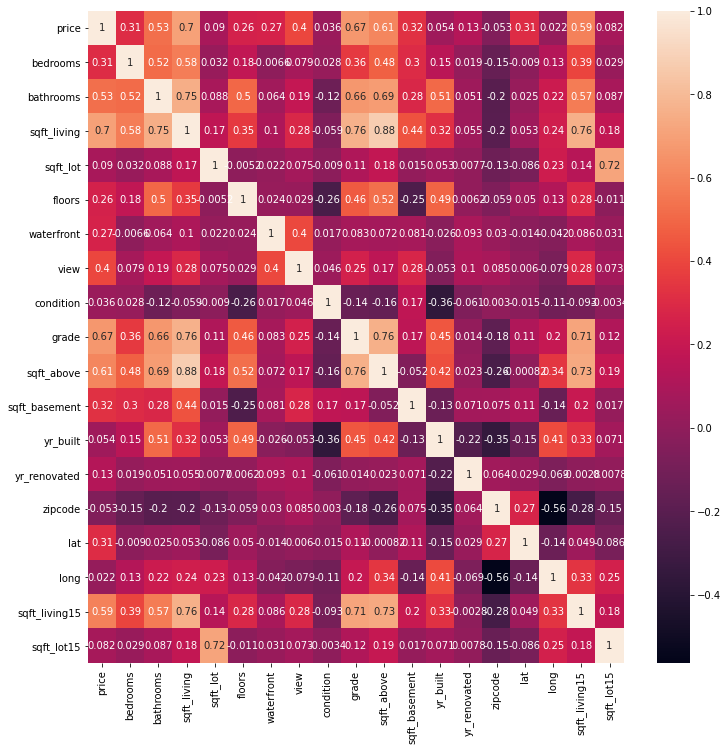

In [41]:
#Plotting visualization of the correlation matrix for better clarity 
plt.figure(figsize=(12, 12))  
sns.heatmap(corrMatrix, annot = True)

The above heat map visually shows the correlation of the variables as explained above.

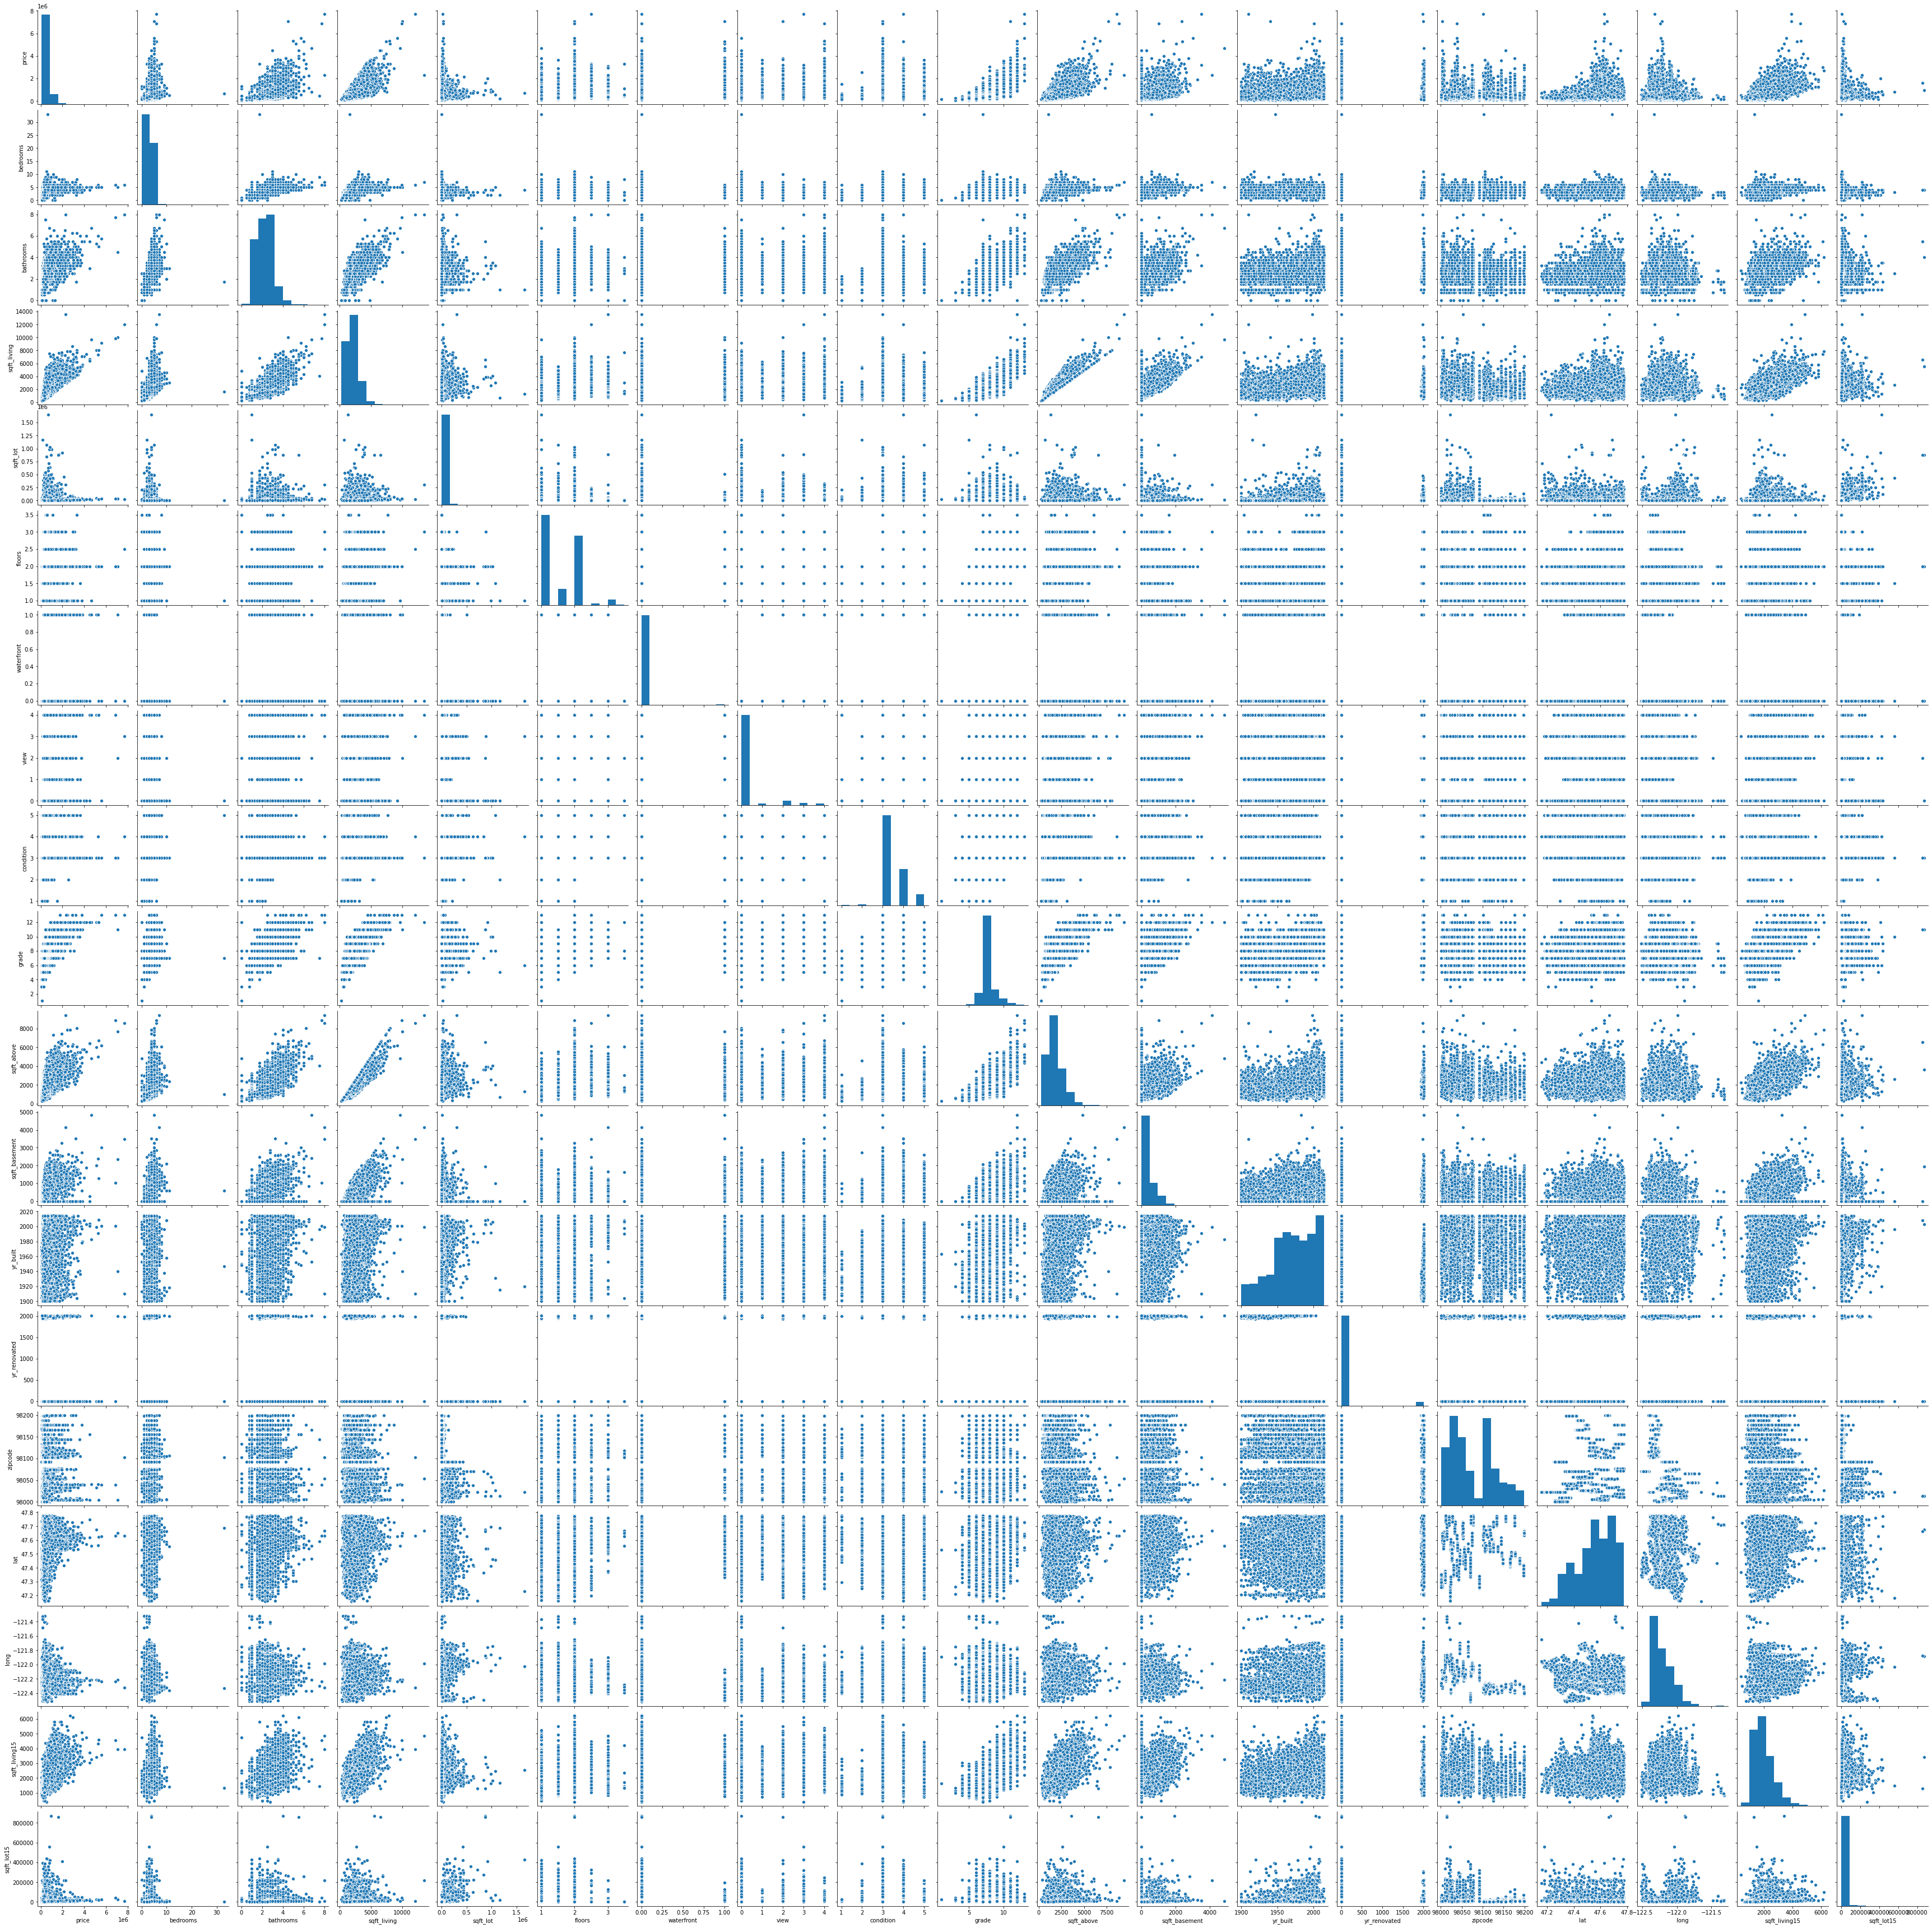

In [42]:
#Plotting pair plots
sns.pairplot(data)
plt.show()

The above pairplot visually summarrizes both the distribution of each single variables and relationships between each variable with the other.

### c.) Multivariate Analysis

#### Linear Discriminant Analysis

We'll perform Linear Discriminant Analysis in order to determine which factors affect the pricing of houses the most.

In [193]:
#Dropping the longitute variable as it has negative values hence will affect the performance of the LDA model
data1 =data.drop(['long'], 1)
#Separating the price variable from the other features
factors = data1.drop(['price'], 1)
price_label = data1['price']
factors.head()

bedrooms  bathrooms  sqft_living  ...         lat  sqft_living15  sqft_lot15
0         3 1.00000000         1180  ... 47.51120000           1340        5650
1         3 2.25000000         2570  ... 47.72100000           1690        7639
2         2 1.00000000          770  ... 47.73790000           2720        8062
3         4 3.00000000         1960  ... 47.52080000           1360        5000
4         3 2.00000000         1680  ... 47.61680000           1800        7503

[5 rows x 17 columns]

In [194]:
#Subject the features to an LDA model

#Importing Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Creating an instance of LDA
lda = LDA()

lda_= lda.fit(factors, price_label)
lda_factors = lda_.transform(factors)

#Displaying the coeficients of the reducted columns
lda_.coef_

array([[-2.64767544e+00, -6.40735978e+00,  2.11420851e-03, ...,
        -4.25055226e+01, -2.58370987e-04,  3.08259332e-05],
       [-8.31290663e-01,  7.58769210e-02, -1.24316007e-03, ...,
        -2.78989548e+01,  3.00466160e-03, -2.69985099e-06],
       [-2.97185222e+00,  1.28259449e+00,  2.91270933e-04, ...,
        -5.29331222e+00,  4.17163063e-04,  3.15104941e-07],
       ...,
       [-6.54404199e+00,  1.36967908e+01,  1.59723355e-02, ...,
         6.26460023e+01, -9.45567370e-03,  2.40805522e-06],
       [-7.42672960e+00, -4.39383868e+00,  2.39596015e-02, ...,
         6.31442092e+01, -8.36621602e-03, -7.43174223e-05],
       [-1.02499122e+01,  9.55254112e+00,  2.44721366e-02, ...,
         6.62751059e+01, -1.25840535e-02, -8.03611965e-05]])

The array displays the coefficients of the reducted columns

In [195]:
#Creating a dataframe so that we can extract the name of the columns since the coefficients are in an array
factors_price = pd.DataFrame(index=factors.columns.values, data=lda_.coef_[0].T)
pd.options.display.float_format='{:.8f}'.format 
factors_price.sort_values(0, ascending=False) 

0
floors          0.89721211
yr_built        0.16688766
sqft_living     0.00211421
sqft_basement   0.00166262
sqft_above      0.00135268
sqft_lot15      0.00003083
sqft_lot       -0.00001445
sqft_living15  -0.00025837
yr_renovated   -0.00029353
zipcode        -0.00845157
view           -0.86112168
condition      -2.49909156
bedrooms       -2.64767544
bathrooms      -6.40735978
grade         -11.48495688
waterfront    -12.14352677
lat           -42.50552262

The above dataframe shows the most relevant variables arranged in a descending order; from the most relevant to the least relevant.

The number of floors, year built, the square feet area of the living area,square feet area of the basement, the square feet area above the basement are by far the most relevant factors that influence the price of the house.


## 7.) Implementing the solution

### a.) Multiple Linear Regression

#### i.) Creating a baseline model

In [45]:
#Getting the required columns from the dataset
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = data['price'].values

#Splitting the dataset into train and test sets
#20% of the data will be used as test, the rest will be the training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Creating a regressor object, and train it using the train data

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Display the intercept / bias
print(regressor.intercept_)

#Display the coefficient
print(regressor.coef_)

5421048.195287973
[-3.64902421e+04  3.88923494e+04  1.10902730e+02  1.55767776e-01
  6.04117988e+03  6.40593526e+05  5.30402689e+04  2.71859259e+04
  9.52167466e+04  6.98553673e+01  4.10473628e+01 -2.56322018e+03
  2.02332123e+01 -5.74793218e+02  6.01963167e+05 -2.18412246e+05
  2.46714516e+01 -4.03347575e-01]


In [47]:
#Feeding the model the data saved for testing.
y_predict = regressor.predict(X_test)

#We will have the model predict the price based on the independent variables
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#Comparing that to the actual status from the original dataset.
comparison_frame.describe()

Actual     Predicted
count  4.322000e+03  4.322000e+03
mean   5.434344e+05  5.402881e+05
std    3.625612e+05  3.105940e+05
min    8.100000e+04 -5.055941e+05
25%    3.230000e+05  3.344819e+05
50%    4.500000e+05  4.821850e+05
75%    6.500000e+05  6.820888e+05
max    4.000000e+06  2.357673e+06

The baseline model is not such a bad model however it is very off when it comes to predicting the minimum and the maximum value.

In [48]:
#Calculating the metrics for the baseline model

#The first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

#The second is MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#Finally, the RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

#Printing the variance score
print('Variance score: {0:.2f}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 125018.12831949051
Mean Squared Error: 38256390781.78335
Root Mean Squared Error: 195592.4098266171
Variance score: 0.71


An RMSE of 195,592.4098266171 is more than 10% of the mean of the dependent variable hence our model is not so good a model. Our model also has an accuracy score of 71%.

These scores will be a benchmark for the other models we create using Multiple Linear Regression.

#### ii.) Creating a model with the most relevant independent variables.

In [49]:
#Getting the required columns from the dataset
X = data[['bathrooms','sqft_living','view','grade','sqft_above','sqft_living']].values
y = data['price'].values

##Splitting the dataset into train and test sets
#20% of the data will be used as test, the rest will be the training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#creating a regressor object, and train it using the train data

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-571768.7114272868
[-3.01885761e+04  1.05199369e+02  9.42542163e+04  1.03403792e+05
 -4.29934673e+01  1.05199369e+02]


In [52]:
#Feeding the model the data saved for testing.
y_predict = regressor.predict(X_test)

#We will have the model predict the price based on the independent variables
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#Comparing that to the actual status from the original dataset.
comparison_frame.describe()

Actual     Predicted
count  4.322000e+03  4.322000e+03
mean   5.434344e+05  5.371473e+05
std    3.625612e+05  2.796242e+05
min    8.100000e+04 -4.198174e+05
25%    3.230000e+05  3.477899e+05
50%    4.500000e+05  4.696164e+05
75%    6.500000e+05  6.728054e+05
max    4.000000e+06  2.175728e+06

Using the most relevant independent variables does not improve the model as it still has very little difference from the baseline model.

In [53]:
#Calculating the metrics for linear regression

#The first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

#The second is MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#Finally, the RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

#Printing the variance score
print('Variance score: {0:.2f}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 155495.31563139494
Mean Squared Error: 53658331346.43723
Root Mean Squared Error: 231642.6803213027
Variance score: 0.59


The RMSE changes so much and is more compared to the baseline model hence our model is still not so good a model, it's worse.

The accuracy score also drops from 71% to 59%.

The models perform badly due to presence of outliers in the dataset as had been depicted earlier.

Therefore we'll remove these outliers to see if there will be an improvement.

#### iii.) Removing Outliers

Removing Outliers and creating a model using a dataset with no outliers

In [54]:
#Removing outliers using the Interquartile Range
Q1 = data.quantile(0.4)
Q3 = data.quantile(0.65)
IQR = Q3 - Q1
data2 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
#Building the model

#Getting the required columns from the dataset
X = data2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = data2['price'].values

##Splitting the dataset into train and test sets
#20% of the data will be used as test, the rest will be the training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#creating a regressor object, and train it using the train data

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

9695928.553860852
[-2.51638287e+03 -1.04636131e+04  7.32574167e+01 -6.41136935e+00
  8.72740679e+03  1.74622983e-10 -4.34306457e-09  1.43700163e-10
  5.90647896e+04  2.14495376e+01  5.18078790e+01 -1.15374890e+03
 -2.91038305e-11 -6.74413136e+00  4.53517650e+05  2.32990371e+05
  2.17432801e+01 -3.95971741e+00]


In [57]:
#Feeding the model the data saved for testing.
y_predict = regressor.predict(X_test)

#We will have the model predict the price based on the independent variables
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#Comparing that to the actual status from the original dataset.
comparison_frame.describe()

Actual      Predicted
count     433.000000     433.000000
mean   456005.230947  450530.680555
std    132336.067085   93344.367419
min    180500.000000  176575.000403
25%    355000.000000  397526.059738
50%    445000.000000  457601.999847
75%    550000.000000  519868.969592
max    775000.000000  669177.765206

The model improves when outliers are removed. The prediction of most values improve although the standard deviation, the 2nd quantile and the maximum value are a little bit off.

In [58]:
#Calculating the metrics for linear regression

#The first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

#The second is MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#Finally, the RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

#Printing the variance score
print('Variance score: {0:.2f}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 69186.48581271141
Mean Squared Error: 7509755175.49058
Root Mean Squared Error: 86658.84360808526
Variance score: 0.57


There is also an improvement in the RMSE as it is lower than that of the other models although the accuracy drops to 57%.

#### iv.) Detecting Multicollinearity

In [59]:
#Understanding how the independent variables are correlated

#Removing the dependent column in order to focus on the independent variables
independent_only = data.drop(columns=['price'])

#Displaying the correlations between the variables
correlations = independent_only.corr()
correlations

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.515935  ...       0.391633    0.029233
bathrooms      0.515935   1.000000  ...       0.568665    0.087191
sqft_living    0.576674   0.754688  ...       0.756420    0.183285
sqft_lot       0.031699   0.087750  ...       0.144620    0.718556
floors         0.175448   0.500669  ...       0.279861   -0.011250
waterfront    -0.006583   0.063747  ...       0.086469    0.030702
view           0.079433   0.187891  ...       0.280404    0.072577
condition      0.028422  -0.124940  ...      -0.092854   -0.003424
grade          0.357003   0.664990  ...       0.713208    0.119265
sqft_above     0.477619   0.685351  ...       0.731870    0.194060
sqft_basement  0.303077   0.283814  ...       0.200367    0.017260
yr_built       0.154276   0.505997  ...       0.326298    0.070999
yr_renovated   0.018695   0.050879  ...      -0.002841    0.007837
zipcode       -0.152721  -0.203831  ...      -0.279033   -0.147257
lat           -0.008953   0.024590  ...       0.048839   -0.086423
long           0.129474   0.223047  ...       0.334592    0.254475
sqft_living15  0.391633   0.568665  ...       1.000000    0.183194
sqft_lot15     0.029233   0.087191  ...       0.183194    1.000000

[18 rows x 18 columns]

In [60]:
#Using these correlations to compute the VIF score for each variable.
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.652159  -0.461426  ...       0.025284    0.085416
bathrooms     -0.461426   3.351248  ...       0.092020    0.071444
sqft_living   -0.614125  -3.147527  ...      -1.068731   -0.050464
sqft_lot       0.049327  -0.024033  ...       0.163933   -1.459308
floors         0.049848  -0.675409  ...       0.272632    0.072657
waterfront     0.063078   0.010097  ...       0.054397   -0.018480
view           0.114430  -0.042387  ...      -0.325388   -0.007469
condition     -0.050633  -0.137265  ...       0.075908   -0.028242
grade          0.306941  -0.267927  ...      -0.911600    0.071863
sqft_above    -0.321458   1.564793  ...      -0.572072   -0.130215
sqft_basement -0.188443   0.437284  ...       0.043883   -0.035249
yr_built       0.134509  -0.935745  ...       0.077695   -0.033746
yr_renovated   0.045800  -0.260436  ...       0.099266   -0.022195
zipcode        0.080174   0.041789  ...       0.210240   -0.015488
lat            0.050839  -0.041080  ...      -0.094792    0.036656
long           0.017554   0.053741  ...      -0.354493   -0.160875
sqft_living15  0.025284   0.092020  ...       2.979647   -0.125593
sqft_lot15     0.085416   0.071444  ...      -0.125593    2.135659

[18 rows x 18 columns]

Some of the VIF scores are way above 5 i.e. the Square feet area of living area, Square feet area above the basement and Square feet area off basement.

Removing these VIF scores to see if there is an improvement.

In [61]:
revised = independent_only.drop(columns=['sqft_living','sqft_above','sqft_basement'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.459639  -0.797621  ...      -0.255790    0.052407
bathrooms     -0.797621   2.695228  ...      -0.329150    0.020730
sqft_lot       0.015625  -0.070430  ...       0.102139   -1.466339
floors         0.072855  -0.470760  ...       0.139986    0.060065
waterfront     0.047175  -0.006948  ...       0.020338   -0.022285
view           0.081416  -0.151196  ...      -0.321881   -0.007985
condition     -0.057630  -0.173065  ...       0.089528   -0.027071
grade          0.013440  -0.706067  ...      -1.415296    0.014060
yr_built       0.242510  -0.754958  ...       0.243273   -0.014442
yr_renovated   0.043538  -0.266856  ...       0.098462   -0.022335
zipcode        0.057631  -0.004826  ...       0.184653   -0.018624
lat            0.063493  -0.052337  ...      -0.042606    0.042179
long          -0.007161   0.072536  ...      -0.453193   -0.171342
sqft_living15 -0.255790  -0.329150  ...       2.498875   -0.180790
sqft_lot15     0.052407   0.020730  ...      -0.180790    2.129302

[15 rows x 15 columns]

All the VIF scores drop showing that most variables were correlated to the variables dropped.

#### v.) Building a model with the revised variables

In [62]:
#Getting the required columns from the dataset
X = revised.values
y = data['price'].values

##Splitting the dataset into train and test sets
#20% of the data will be used as test, the rest will be the training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#creating a regressor object, and train it using the train data

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

6559080.119686094
[-4.20321930e+03  1.04851406e+05  2.93919850e-01  1.14008321e+04
  6.85221980e+05  5.70537465e+04  2.67649983e+04  1.37600365e+05
 -3.14585081e+03  2.15896945e+01 -5.08998757e+02  5.78115194e+05
 -1.72065198e+05  9.40892972e+01 -1.75347281e-01]


In [64]:
#Feeding the model the data saved for testing.
y_predict = regressor.predict(X_test)

#We will have the model predict the price based on the independent variables
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#Comparing that to the actual status from the original dataset.
comparison_frame.describe()

Actual     Predicted
count  4.322000e+03  4.322000e+03
mean   5.434344e+05  5.419604e+05
std    3.625612e+05  3.047868e+05
min    8.100000e+04 -7.290389e+05
25%    3.230000e+05  3.419879e+05
50%    4.500000e+05  4.943316e+05
75%    6.500000e+05  6.799736e+05
max    4.000000e+06  2.412770e+06

Removing highly correlated variables does not improve the model as it still has very little difference from the ther 2 models.

In [65]:
#Calculating the metrics for linear regression

#The first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

#The second is MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#Finally, the RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

#Printing the variance score
print('Variance score: {0:.2f}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 130239.49984466014
Mean Squared Error: 42923342713.656395
Root Mean Squared Error: 207179.49395067166
Variance score: 0.67


The RMSE also doesn't change much compared to the baseline model hence our model is still not so good a model although the accuracy improves to 67%.

#### vi.) Residual plot and heteroskedasticity

In [66]:
#Creating the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-1473.9489623111924

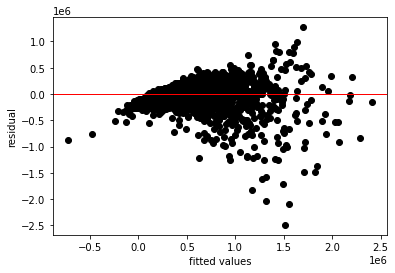

In [67]:
#Plotting the residual plot

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: the residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns.

However performing a heteroskedasticity test will be more thorough.

In [68]:
#Performing a heteroskedasticity test
#Using bartlett's test to establish a null hypothesis that the variance is equal for all the datapoints,
#and the new hypothesis that the variance is different for at least one pair of datapoints.
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#Computing a critical value of the chi squared distribution  to interpret the results
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

#If the test_result is greater than the critical value, then we reject our null
#hypothesis. This would mean that there are patterns to the variance of the data

#Otherwise, we can identify no patterns, and we accept the null hypothesis that 
#the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

The variances are homogeneous!


The variances are homogeneous hence we accept the null hypothesis therefore no patterns can be identified in the dataset

### b.) Quantile Regression

#### i.) Building the model

In [69]:
## Creating a linear regression model to predict the prices of houses

X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: {0:.2f}'.format(regressor.score(X_test, y_test)))

Mean Absolute Error: 125018.12831949051
Mean Squared Error: 38256390781.78335
Root Mean squared error: 195592.4098266171
Variance score: 0.71


These scores will be a benchmark for the model we create using Quantile regression.

In [70]:
#Getting the required columns for the dataset 

#Ignoring warnings i.e never print matching warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = data['price']

#Preparing the quantiles to work with
quantiles = np.arange(0.1,1,0.1)
models = []
params = []
#Loop to change the columns
for i in np.arange(0,18,1):
  x = X.iloc[:,i]
  mod = smf.quantreg('y ~ x', data)
  #Looping to calculate the quantile data
  for qt in quantiles:
    res = mod.fit(q = qt)
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
params.head(161)

qt      intercept        x_coef  cf_lower_bound  cf_upper_bound
0    0.1  119799.999998  40050.000001    37230.100748    42869.899253
1    0.2  134999.999998  50000.000001    47090.337138    52909.662864
2    0.3  149750.000006  61049.999999    57639.130857    64460.869140
3    0.4  165000.000001  72500.000000    68716.436956    76283.563044
4    0.5  179999.999994  85000.000002    81011.031417    88988.968587
..   ...            ...           ...             ...             ...
156  0.4       0.000013      2.692172       -4.521020        9.905364
157  0.5  440825.602843      0.870936        0.733319        1.008553
158  0.6  504306.952099      0.979891        0.816693        1.143089
159  0.7  567787.562906      1.331949        1.169391        1.494507
160  0.8  664736.035626      1.853605        1.661589        2.045621

[161 rows x 5 columns]

#### ii.) Interpretting the Quantiles for each independent variable.

In [71]:
#Checking the quantiles for the independent variables
print(params.loc[0:8,:])
print(params.loc[9:17,:])
print(params.loc[18:26,:])
print(params.loc[27:35,:])
print(params.loc[36:44,:])
print(params.loc[45:53,:])
print(params.loc[54:62,:])
print(params.loc[63:71,:])
print(params.loc[72:80,:])
print(params.loc[81:89,:])
print(params.loc[90:99,:])
print(params.loc[99:107,:])
print(params.loc[108:116,:])
print(params.loc[117:125,:])
print(params.loc[126:134,:])
print(params.loc[135:143,:])
print(params.loc[144:152,:])
print(params.loc[153:160,:])

    qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
0  0.1  119799.999998   40050.000001    37230.100748    42869.899253
1  0.2  134999.999998   50000.000001    47090.337138    52909.662864
2  0.3  149750.000006   61049.999999    57639.130857    64460.869140
3  0.4  165000.000001   72500.000000    68716.436956    76283.563044
4  0.5  179999.999994   85000.000002    81011.031417    88988.968587
5  0.6  188333.333332  101666.666667    96935.830917   106397.502417
6  0.7  189574.999994  122712.500003   117858.065984   127566.934021
7  0.8  191000.000003  151999.999999   145541.134223   158458.865774
8  0.9  150000.000001  215000.000000   203156.804610   226843.195389
     qt      intercept         x_coef  cf_lower_bound  cf_upper_bound
9   0.1   86000.000000   87000.000000    84737.068391    89262.931609
10  0.2   97499.999999  105000.000001   102204.576117   107795.423885
11  0.3   99666.666639  129333.333360   125837.105581   132829.561139
12  0.4  101666.666652  153333

Houses with low pricing will cost less when one more of any independent variables is needed compared to houses with high prices. e.g Houses with low pricing(0.2 quantile) will cost 61,049 more for one more bedroom while houses with high prices(0.8 quantile) will cost 151,999 more for one more bedroom.

Below is a list prices comparing high and low prices of houses in the case of purchase of one more facility i.e. bedrooms, bathrooms, view etc.
The negative implies that the house will cost less.

Bedroom LOW-50000.00000057 HIGH-151999.99999851


Bathroom LOW-105000.00000058 HIGH-260666.66666850


Square feet area of living area LOW-151.80935569 HIGH-287.08133932


Square feet area of parking Layout LOW-0.49978166 HIGH-1.14892373


Number of Floors LOW-83502.49999474 HIGH-240000.00000182


Whether waterfront is there or not LOW-366999.99999959 HIGH-1810050.00000023


Number of Views LOW-88104.99999997 HIGH-257499.99999882


Condition LOW--3999.99999898 HIGH--5499.99999974


Grades LOW-122899.99999937 HIGH-203333.33333322


Square feet area above the basement LOW-140.97491638 HIGH-285.21126761


Square feet area off basement LOW-120.36585366 HIGH-269.99999908


Year the house is built LOW-810.98295549 HIGH-640.00210488


Year the house is renovated LOW-37.27636210 HIGH-154.11471301


Zipcode os the house LOW-3.04416416 HIGH-7.14256558


Latitude of the house LOW-443122.97036743 HIGH-1153229.67419147


Longitude of the house LOW-78835.97919893 HIGH-128631.97491455


sqft_living15 LOW-178.53448276 HIGH-327.06766917


sqft_lot15 LOW-0.62517366 HIGH-1.85360483



### c.) Ridge Regression

#### i.) Getting the columns

In [73]:
#Getting the required columns for the dataset 
import statsmodels.formula.api as smf
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = data['price'].values

#### ii.) Baseline Model

In [74]:
#Creating our baseline regression model with no regularization to it

#Splitting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#Printing the mean squared error
print('Mean Squared error for the baseline model is: ',mean_squared_error(y_test, y_pred))
#Printing the coefficient values of the baseline model
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

Mean Squared error for the baseline model is:  38256390781.78335


{'bathrooms': 110.90273033715862,
 'bedrooms': 38892.34939504744,
 'condition': 95216.74655579429,
 'floors': 640593.5256565436,
 'grade': 69.85536731813353,
 'lat': -218412.24577539813,
 'long': 24.671451560371803,
 'price': -36490.24209271998,
 'sqft_above': 41.0473628479492,
 'sqft_basement': -2563.2201826783976,
 'sqft_living': 0.15576777602483116,
 'sqft_living15': -0.4033475748983619,
 'sqft_lot': 6041.179876421704,
 'view': 27185.925902602612,
 'waterfront': 53040.26888506897,
 'yr_built': 20.233212268237782,
 'yr_renovated': -574.793217751986,
 'zipcode': 601963.1670396248}

The value of the mean squared error is 38256390781.782135 and this will be the indicator to determine if the regularized ridge regression model is superior or not.

We'll compare the coefficients of our baseline model to those of the ridge model.

#### iii.) Ridge model

In [75]:
#Creating the ridge model

#Determining the most appropriate value for the l2 regularization(ridge) by determining the value of the alpha using grid search
#Alpha is the hyperparameter we are trying to set 

#Creating our ridge model and indicating normalization in order to get better estimates.
ridge = Ridge(normalize=True)

#Setting up the grid that we will use.
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [76]:
#Using the .fit function to run the model and then using the .best_params_ and .best_scores_ function to determine the models strength. 
search.fit(X_train,y_train)
search.best_params_
#Printing the value of the alpha
print(search.best_params_)

#Printing the possible mean squared error
abs(search.best_score_) 

{'alpha': 0.01}


41495603787.6527

The best_params_ tells us what to set alpha too which in this case is 0.01.
 
The best_score_ tells us what the best possible mean squared error is. 
In this case, the value of 41495603787.65297 is worse than what the baseline model was.

In [77]:
#Fitting a ridge regression model with alpha = 0.01
ridge = Ridge(alpha = 0.01, normalize = True)

#Fitting a ridge regression on the training data
ridge.fit(X_train, y_train)

#Use this model to predict the test data
y_pred = ridge.predict(X_test)

#Printing the mean squared error
print('Mean Squared error for the ridge model is: ', mean_squared_error(y_test, y_pred))
#Printing the coefficient values of the ridge model
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

Mean Squared error for the ridge model is:  38257327097.68908


{'bathrooms': 88.08352441819532,
 'bedrooms': 38715.19889699088,
 'condition': 93470.64166421001,
 'floors': 635712.9978369692,
 'grade': 90.55875712044217,
 'lat': -216469.3325293614,
 'long': 27.35487548766372,
 'price': -35292.53274123426,
 'sqft_above': 62.925760991510124,
 'sqft_basement': -2500.590996111519,
 'sqft_living': 0.1531983460264721,
 'sqft_living15': -0.3903766417455301,
 'sqft_lot': 6614.537687528584,
 'view': 27549.069682183268,
 'waterfront': 53104.026233589255,
 'yr_built': 21.328092707688736,
 'yr_renovated': -553.5247301403984,
 'zipcode': 597371.5321455741}

The 38257327097.68908 is lower than the 41495603787.65297. This is because the last results are not cross-validated. 

In addition, these results indicate that there is little difference between the ridge and baseline models.

This is confirmed with the coefficients of each model.
The coefficient values are about the same. This means that the penalization made little difference with this dataset.

In [78]:
#Finally, we refit our ridge regression model on the full data set
ridge.fit(X, y)
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 88.18502650549269,
 'bedrooms': 40806.9671849768,
 'condition': 94216.36803879826,
 'floors': 578347.8512517631,
 'grade': 91.0170354383918,
 'lat': -212984.00121032313,
 'long': 24.491513161752152,
 'price': -34541.37584795019,
 'sqft_above': 61.135414015326376,
 'sqft_basement': -2558.057689834451,
 'sqft_living': 0.12691332668336355,
 'sqft_living15': -0.3715047966363165,
 'sqft_lot': 7383.537429823004,
 'view': 26830.351332046885,
 'waterfront': 53063.11279790343,
 'yr_built': 21.122630813003116,
 'yr_renovated': -561.155956247487,
 'zipcode': 598348.26228896}

As expected, none of the coefficients are exactly zero implying that ridge regression does not perform variable selection.

### d.) Lasso Regression

#### i.) Data Preparation

In [79]:
#Getting the required columns for the dataset 
import statsmodels.formula.api as smf
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = data['price'].values
#Scaling data to normalise the data within a particular range
#This will speed up the calculations in our algorithm 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### ii.) Building the model

In [80]:
#Building a basic Lasso model. 
#We will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
#We are not setting the alpha, it is defined as 1.

#Creating lasso object
lasso = linear_model.Lasso() 

#Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998054426678352
lasso MSE: 40516476424.81792
lasso coef: [-33266.88233668  31637.6631829  259485.35635095   5304.44525436
   3657.82919038  50406.18341507  40634.06469055  17213.01805439
 112832.08022218 -83795.31887747 -58563.3849552  -77017.13543297
   8043.51869173 -31173.4407627   83544.44491153 -30240.53390784
  14862.22210763 -10437.22505233]


The value of the mean squared error is 40516476424.81792 and this will be the indicator to determine if the regularized Lasso regression model is superior or not.

We'll compare the coefficients of our baseline model to those of the regularized lasso model.

In [81]:
#Building a Lasso model. 
 
#In this case, a model with the highest R-squared score will give us the best parameters.

#Ignoring warnings i.e never print matching warnings
warnings.filterwarnings("ignore")

#Splitting data into training and test sets, and choosing a set of parameters 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#Choosing the regularization parameter with the help of GridSearch.
#For that, we have to define the set of parameters for GridSearch. 
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#Creating a regressor object for linear, lasso and gridlasso(regularized) regressions
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

#Fitting the models and printing the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7048549907510334
linear score: 0.7049715277486102
lasso MSE: 40137362943.68444
linear MSE: 40121514843.186295
lasso best estimator coef: [-33498.54420994  29163.04166888 209585.24155778   5164.47444239
   4407.61294344  45868.63922007  42462.9295721   16496.5834434
 112536.31786789 -36375.16341284 -31750.32900409 -75967.88554473
   6724.89795266 -31568.90621004  84407.91149052 -29206.2002946
  11661.01791709 -10298.77344216]
linear coef: [-3.48454584e+04  2.89583267e+04  1.93746287e+18  4.45041645e+03
  4.18779520e+03  4.60107055e+04  4.21729026e+04  1.63693780e+04
  1.12303885e+05 -1.74685630e+18 -9.33603041e+17 -7.58595823e+04
  7.40697842e+03 -3.14142044e+04  8.44455939e+04 -2.89196415e+04
  1.18389975e+04 -9.64933925e+03]


The Reguralized Lasso MSE(40137362943.68444) is lower than the initial Lasso model. This is because the initial model had not been regularized. 

In addition, the MSE of the linear model is alittle bit lower than the lasso model(40121514843.186295). 

The Lasso Regression attained an accuracy of 70.48% with the given Dataset which is not so different from the accuracy of the linear model(70.49%)

These results, the MSE and the accurracy score, indicate that there is little difference between the lasso and the linear model.

This is confirmed with the coefficients of each model.
The coefficient values are about the same, however some of the coefficients have been shrunk towards zero. This means that the penalization made little difference with this dataset.

#### iii.) Visualizing the Lasso Coefficients

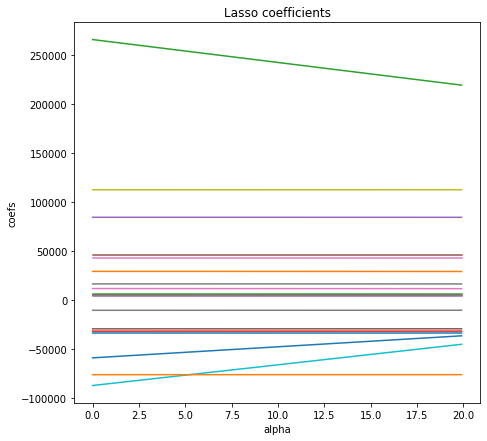

In [82]:
#Building Lasso for 200 values of alpha and write the coefficients into array
coefsLasso = []  
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

#Building Lasso coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

From the above, we can see that Lasso influences less on the large coefficients, but for the small ones, Lasso reduces to zero. 

### e.)Elastic Net Regression

#### i.) Getting the columns

In [83]:
#Getting the required columns for the dataset 
import statsmodels.formula.api as smf
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = data['price']

#### ii.) Building the model

In [84]:
#Building our linear regression model for the purpose of comparison
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)  

40516476382.74072


The mean standard error score of 40516476382.74072 is the benchmark for determining if the elastic net model will be better or worse.

In [85]:
#Below are the coefficients of this first model. 
#A for loop is used to go through the model and the zip function to combine the two columns.
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 41086.47968596025,
 'bedrooms': -35768.710655471565,
 'condition': 26452.7797947939,
 'floors': 6774.4735604968455,
 'grade': 95986.4378714205,
 'lat': 602919.8978106875,
 'long': -214749.27038036622,
 'sqft_above': 70.8187396972601,
 'sqft_basement': 39.683424555955206,
 'sqft_living': 110.50216396308053,
 'sqft_living15': 21.69250043838404,
 'sqft_lot': 0.12813586026899332,
 'sqft_lot15': -0.38234329475380946,
 'view': 53038.767089070556,
 'waterfront': 582596.6679527978,
 'yr_built': -2622.195591793414,
 'yr_renovated': 20.036006530019126,
 'zipcode': -582.6833384627707}

In [86]:
#Building our Elastic Net Model
#Indicating normalization in order to get better estimates. 
#Elastic net requires normalized data.  

elastic=ElasticNet(normalize=True)

#Determining the most appropriate value for the regularization by determining the value of the alpha using grid search
#Alpha is the hyperparameter we are trying to set 
#Creating our grid

search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [87]:
#Using the .fit function to run the model and then using the .best_params_ and .best_scores_ function to determine the models strength. 
search.fit(X,y)
search.best_params_
#Printing the value of the alpha
print(search.best_params_)

#Printing the possible mean squared error
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


41056391892.67915

The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8.
With these settings we got an MSE of 41056391892.67915. 

This is above our baseline model of MSE 40516476382.74072  for the baseline model which means that elastic net is doing worse than linear regression.

In [88]:
#For clarity, we will set our hyperparameters to the recommended values and run on the data.
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
#Printing the mean squared error
print('Mean Squared error for the baseline model is: ',mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
#Printing the coefficient values of the model
#A for loop is used to go through the model and the zip function to combine the two columns.
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

Mean Squared error for the baseline model is:  40617078111.499664


{'bathrooms': 40080.93905141283,
 'bedrooms': -30825.401738192882,
 'condition': 27751.115250911454,
 'floors': 9092.5181624262,
 'grade': 89138.1336916659,
 'lat': 583393.3082283601,
 'long': -206611.44456200232,
 'sqft_above': 87.49742045635497,
 'sqft_basement': 61.32638937630348,
 'sqft_living': 85.36822139636668,
 'sqft_living15': 32.10722625702676,
 'sqft_lot': 0.12227747523517753,
 'sqft_lot15': -0.33788053280932984,
 'view': 53120.654857529626,
 'waterfront': 564761.7304552095,
 'yr_built': -2370.5847644569476,
 'yr_renovated': 24.123226091164373,
 'zipcode': -497.23591138766966}

Setting our hyperparameters to the recommended values results to an MSE closer to that of the baseline model, therefore, there's not much difference from the linear regression.

In addition, the coefficients are mostly the same. 

None of the variables was completely removed from the model in the elastic net version although some of the coefficients were shrunk towards zero.

## 8.) Conclusion and Recommendations

> **Multiple Linear Regression Model** : This model is an appropriate model when outliers are removed as it is heavily biased by a few outliers in the dataset. However, it's highly unrecommended in this case where outliers are a huge part of the dataset and are very relevant. Removing outliers resulted to a dataset with only 2164 rows, a huge reduction from the main dataset with 21,613 rows. This really influnced the performance of the model as we were dealing with a small dataset.


> **Quantile Regression Model** : This model is very appropriate for this kind of dataset. It is robust to outliers, which is plenty in our dataset. It's also very beneficial as well when heteroskedasticity is present in the dataset, as in the case of our dataset. The dataset is also skewed and this model would be perfect for such. The distribution of the pricing of the houses can also be described via various quantiles since prices differ significantly i.e high, low and median prices.


> **Ridge Regression** : This model is approprite for our dataset in which more than two independent variables are highly correlated i.e. Multicollinearity. It also performs well with large data with a large number of predictors as in the case with our dataset. However, the model did not perform feature selection and select the best features to use. Our dataset had many predictor variables hence would have been better if the best features were selected by this model.


> **Lasso Regression** : This model, just like the ridge, is highly recommended on our dataset as it has multicollinearity. However it is preffered as it shrinks the coefficients of the useless variables . It does not affect the larger coefficients only the small ones. However in our case where each factor was seen to have an effect on the pricing of the house, this model would do more harm by eliminating some factors by shrinking their coefficients to zero.


> **Elastic Net Regression** This model's algorithm is a combination of Lasso and Ridge and is very appropriate as it will not get rid of useless variables unless they are utterly useless. In this case our dataset did not contain useless variables hence none were removed.











## 9.) Follow up questions

### a). Did we have the right data?

Yes, we had the right data

### b). Do we need other data to answer our question?

No, the dataset had a wide range of variables required in predicting the price of the houses.

### c). Did we have the right question?

Yes, we had the right question.